 De la siguiente liga https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) descarga el conjunto de datos, relacionado al Otorgamiento de Crédito, y desarrolla lo siguiente:


# 1. Introducción (Describir las fases del otorgamiento de crédito)

El otorgamiento del crédito es una fase crítica y fundamental en la gestión del riesgo que, gestionada adecuadamente, nos debe garantizar la generación de una cartera sana. Los modelos de scoring y rating son las herramientas fundamentales que nos permiten medir el riesgo que asumimos y fijar los niveles admisibles. 

1. **Estudiar el entorno:**

La situación de la economía, en general, y del sector al cual pertenece la empresa,en particular, son requisitos ineludibles en esta actividad. Hay épocas de crecimiento económico. Cuando los negocios crecen, sus ventas y utilidades aumentan y, por consiguiente, su flujo de efectivo. Pero hay épocas de crisis cuando se contrae la economía, en las cuales no resulta conveniente tomar nuevos riesgos, sino más bien tratar de recuperar los créditos ya otorgados.

2. **Entender el negocio del cliente:**

No se puede otorgar crédito a una empresa cuando no se entiende cómo funciona, cuál es el modelo de negocio, cuáles son sus ciclos de efectivo, la estacionalidad de sus ingresos, entre otros aspectos. Y es que no es lo mismo dar crédito a un agricultor, a una universidad, a una EPS o a una industria manufacturera.

El conocimiento detallado de la manera como funciona el negocio es indispensable, no solo para determinar la periodicidad de los pagos, sino también para tener claros los riesgos inherentes a cada tipo de empresa.

3. **Evaluar estados financieros:**

Los estados financieros, por naturaleza, reflejan la situación económica y la evolución de las cifras de cada empresa. Por consiguiente, el debido entendimiento del estado de situación financiera y del estado de resultados, correspondientes a los tres últimos años, es fundamental en el otorgamiento de un crédito.

Es importante constatar en qué rubros está concentrada la inversión en activos, y si los pasivos principales son obligaciones con bancos, proveedores, laborales o impuestos. Así mismo, es preciso determinar si el patrimonio tiene una adecuada composición, con una buena participación del capital y las reservas.

4. **Analizar indicadores:**

Una herramienta muy útil es la aplicación de indicadores financieros, con el fin de determinar las fortalezas o debilidades que la empresa pueda tener en materia de liquidez (capacidad de pago a corto plazo), márgenes de rentabilidad, situación de endeudamiento y costos del mismo y, finalmente, solvencia o capacidad de pago a largo plazo.

5. **Capacidad de pago:**

Una herramienta de gran utilidad para evaluar la capacidad de pago es el flujo de caja razonablemente proyectado. Para ello hay que tener en cuenta la más probable evolución de la economía y los negocios, utilizando los mejores supuestos de proyección y proponiendo diferentes alternativas, sensibilizando los supuestos más importantes.

6. **Historial crediticio:**

Desde su aparición, las bases de datos (CIFIN, Data Crédito, Covinoc, etc.) se han convertido en una ayuda invaluable en la actividad del otorgamiento de crédito. Dichas bases facilitan información acerca de los hábitos de pago del cliente: si presenta un historial limpio de crédito, si ha tenido dificultades pero las ha superado de manera adecuada, o por el contrario, subsisten problemas sin resolver que dificulten la decisión de crédito.

7. **Tomar garantías:**

Las garantías nunca están de más. Una garantía (hipoteca, prenda, pignoración de ingresos o depósitos) es una gran ayuda cuando la fuente principal de pago, que es el flujo de efectivo, refleja alguna dificultad. Sin embargo, una garantía no hace de un crédito malo o un crédito bueno. La fortaleza del crédito reside en el buen análisis y la capacidad de pago que muestre el flujo de caja. La garantía es solo una seguridad adicional.

# 2. Plantear el problema:

  * En este notebook, utilizaremos los datos de riesgo de crédito alemán del repositorio UCI Machine Learning para construir modelos no supervisados y supervisados con el fin de identificar de manera eficiente el tipo de riesgo creticio que nuevos clientes puedan significar.

  * **Describir el Dataset:**
    * 'German Credit Data' es un conjunto de datos disponible públicamente  en el repositorio de ML de UCI. El conjunto de datos contiene información sobre 20 variables y la clasificación binaria de si un solicitante se considera un riesgo crediticio 'bueno' o 'malo', esto para 1000 solicitantes de préstamos.
    * Fuente: 
      * Professor Dr. Hans Hofmann
      * Institut f"ur Statistik und "Okonometrie
      * Universit"at Hamburg
      * FB Wirtschaftswissenschaften
      * Von-Melle-Park 5
      * 2000 Hamburg 13 


## Instalación e importación de librerías necesarias 

In [ ]:
# Reiniciar el entorno de ejecución una vez instaladas las librerías.
# Añadir un #  y ejecutar el notebook completo

!pip install --pre pycaret

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram , fcluster
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


%matplotlib inline
from pycaret.classification import *

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', sep= " ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.shape

(1000, 21)

In [ ]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

In [ ]:
columns = ['AccStat', 'duration', 'credHist', 'purpose', 'amount',
           'savings_account', 'employment', 'installment_rate', 'status', 'debtor',
           'residence', 'property ', 'age', 'installment plans', 'housing',
           'credits', 'job', 'economic_dependants' ,'telephone', 'foreign',
           'rating']

In [ ]:
data.info()
data.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
data.describe()

,1,4,7,10,12,15,17,20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


<AxesSubplot: >

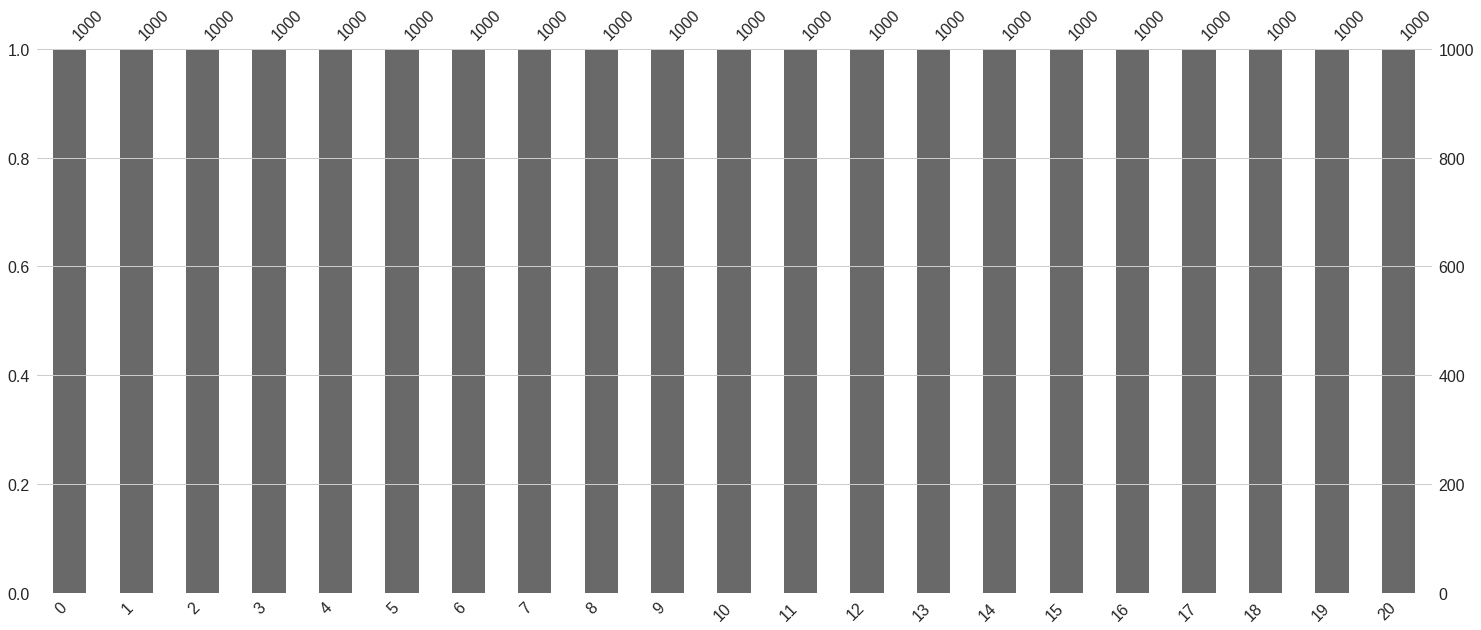

In [ ]:
msno.bar(data)

In [ ]:
cat_feat = list(data.select_dtypes(include = [object]).columns)
num_feat = list(data.select_dtypes(include = [int,float]).columns)
print(cat_feat)
print(num_feat)

[0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]
[1, 4, 7, 10, 12, 15, 17, 20]


In [ ]:
print(cat_feat)
for i in cat_feat:
  print(data[i].unique(), end='\n')

[0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]
['A11' 'A12' 'A14' 'A13']
['A34' 'A32' 'A33' 'A30' 'A31']
['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
['A65' 'A61' 'A63' 'A64' 'A62']
['A75' 'A73' 'A74' 'A71' 'A72']
['A93' 'A92' 'A91' 'A94']
['A101' 'A103' 'A102']
['A121' 'A122' 'A124' 'A123']
['A143' 'A141' 'A142']
['A152' 'A153' 'A151']
['A173' 'A172' 'A174' 'A171']
['A192' 'A191']
['A201' 'A202']


In [ ]:
data[0] = data[0].replace({'A11': 1, 'A12': 2, 'A13': 3, 'A14': 4} )
data[2] = data[2].replace({'A30': 0, 'A31': 1, 'A32': 2, 'A33': 3, 'A34': 4} )
data[3] = data[3].replace({'A40': 0, 'A41': 1, 'A42': 2, 'A43': 3, 'A44': 4, 'A45': 5, 'A46': 6, 'A48': 8, 'A49':  9, 'A410': 10} )
data[5] = data[5].replace({'A61': 1, 'A62': 2, 'A63': 3, 'A64': 4, 'A65': 5} )
data[6] = data[6].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5} )
data[8] = data[8].replace({'A91': 1, 'A92': 2, 'A93': 3, 'A94': 4} )
data[9] = data[9].replace({'A101': 1, 'A102': 2, 'A103': 3} )
data[11] = data[11].replace({'A121': 1, 'A122': 2, 'A123': 3, 'A124': 4} )
data[13] = data[13].replace({'A141': 1, 'A142': 2, 'A143': 3} )
data[14] = data[14].replace({'A151': 1, 'A152': 2, 'A153': 3} )
data[16] = data[16].replace({'A171': 1, 'A172': 2, 'A173': 3, 'A174': 4} )
data[18] = data[18].replace({'A191': 1, 'A192': 2} )
data[19] = data[19].replace({'A201': 1, 'A202': 2} )

# 3. Desarrollo


## Reducción de dimensionalidad (Análisis de componentes Principales - ejercicio opcional)

In [ ]:
datos_robust_scaler = preprocessing.RobustScaler().fit_transform(data)
datos_robust_scaler = pd.DataFrame(datos_robust_scaler,columns=columns)
datos_robust_scaler.head()

,AccStat,duration,credHist,purpose,amount,savings_account,employment,installment_rate,status,debtor,...,property,age,installment plans,housing,credits,job,economic_dependants,telephone,foreign,rating
0,-0.333333,-1.0,1.0,0.5,-0.441354,2.0,1.0,0.5,0.0,0.0,...,-0.5,2.266667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,2.5,0.0,0.5,1.393114,0.0,0.0,-0.5,-1.0,0.0,...,-0.5,-0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.666667,-0.5,1.0,2.0,-0.085739,0.0,0.5,-0.5,0.0,0.0,...,-0.5,1.066667,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
3,-0.333333,2.0,0.0,0.0,2.133883,0.0,0.5,-0.5,0.0,2.0,...,0.0,0.800000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.333333,0.5,0.5,-1.0,0.978421,0.0,0.0,0.0,0.0,0.0,...,1.0,1.333333,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X = datos_robust_scaler.drop(['rating'], axis=1).values
y = datos_robust_scaler['rating'].values.astype(np.int8)
target_names = np.unique(y)

In [ ]:
X.shape

(1000, 20)

<Figure size 1008x504 with 0 Axes>

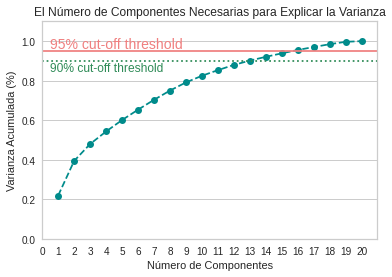

In [ ]:
pca = PCA().fit(X)
plt.figure(figsize = (14,7))
fig, ax = plt.subplots()

xi = np.arange(1, 21, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='darkcyan')

plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada (%)')
plt.xticks(np.arange(0, 21, step=1)) 
plt.title('El Número de Componentes Necesarias para Explicar la Varianza')

plt.axhline(y=0.95, color='lightcoral', linestyle='solid')
plt.text(0.5, 0.965, '95% cut-off threshold', color = 'lightcoral', fontsize=14)
plt.axhline(y=0.90, color='seagreen', linestyle='dotted')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'seagreen', fontsize=12)
ax.grid(axis='x')
plt.show()

In [ ]:
pca = decomposition.PCA(n_components = 13)
X_pca = pca.fit_transform(X)
print('Varianza explicada por cada componente:', pca.explained_variance_)
print('Proporcion de varianza explicada por cada componente:', pca.explained_variance_ratio_)

Varianza explicada por cada componente: [2.11750488 1.69306493 0.8282099  0.61234691 0.55944954 0.50703898
 0.48325147 0.45226523 0.39857561 0.32430175 0.27629147 0.25559274
 0.21102552]
Proporcion de varianza explicada por cada componente: [0.21897205 0.17508054 0.08564553 0.06332305 0.05785291 0.05243311
 0.04997323 0.04676893 0.04121687 0.03353618 0.02857141 0.02643095
 0.02182224]


In [ ]:
n_comp = 13
pca = PCA(n_components = 13, svd_solver = 'full')
X_pca = pca.fit_transform(X)
print('Varianza Explicada: %.5f' % pca.explained_variance_ratio_.sum())
print('Varianza Individual por Componente:')
for j in range(n_comp):
    print('%.5f' %pca.explained_variance_ratio_[j])

Varianza Explicada: 0.90163
Varianza Individual por Componente:
0.21897
0.17508
0.08565
0.06332
0.05785
0.05243
0.04997
0.04677
0.04122
0.03354
0.02857
0.02643
0.02182


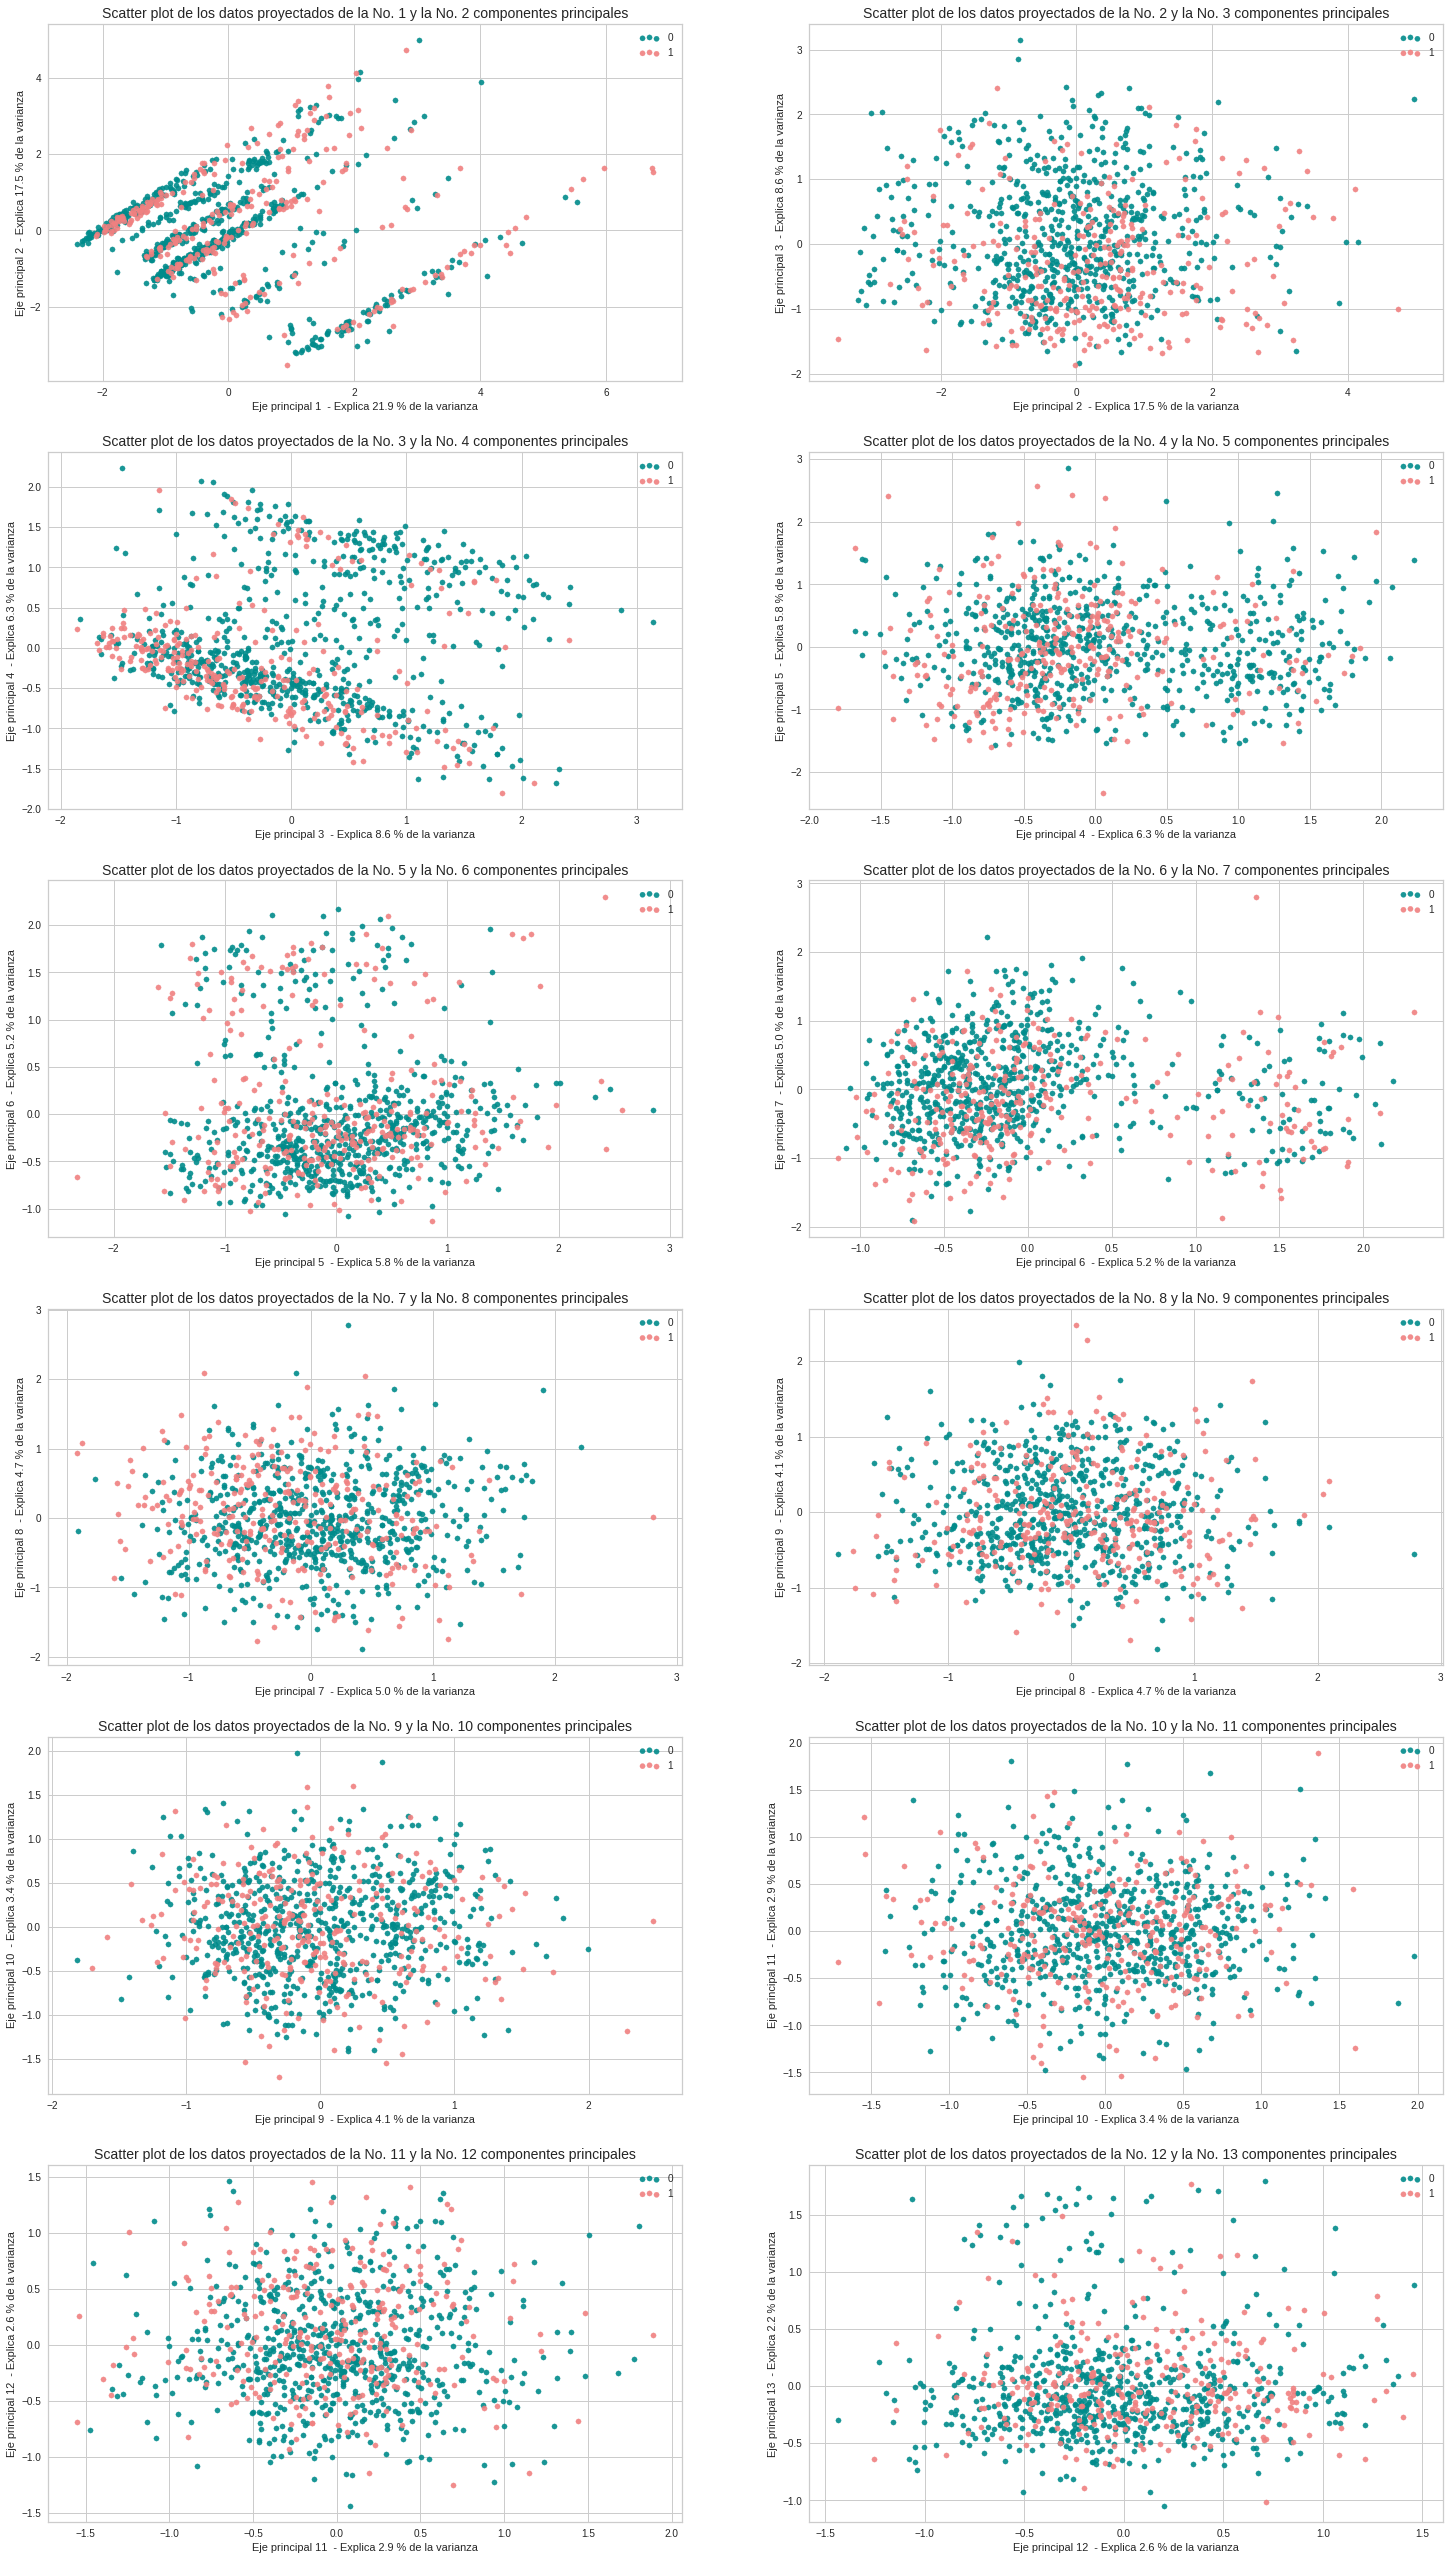

In [ ]:
plt.figure(figsize = (25, 235))
plotnumber = 1
colors = ['darkcyan', 'lightcoral']
for v in list(range(12)):
  ax = plt.subplot(30, 2, plotnumber)
  for color, i, target_name in zip(colors, [0, 1], target_names):
      b = plt.scatter(X_pca[y == i, v], X_pca[y == i, v+1], color=color, s=110,
                alpha=0.9, label=target_name, marker='.')
      plt.legend(loc='best', shadow=False, scatterpoints=3)
      plt.title(
        "Scatter plot de los datos proyectados de la No. " + str(v+1) + " "
        "y la No. " + str(v+2) + " componentes principales", fontsize = 14)
      plt.xlabel("Eje principal " + str(v+1) + "  - Explica %.1f %% de la varianza" % (
        pca.explained_variance_ratio_[v] * 100.0))
      plt.ylabel("Eje principal " + str(v+2) + "  - Explica %.1f %% de la varianza" % (
        pca.explained_variance_ratio_[v+1] * 100.0))
  plotnumber += 1
plt.show()

In [ ]:
ps = pd.DataFrame(X_pca)
ps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.888718,-0.862977,2.859763,0.472488,0.469586,-0.316261,0.236442,-0.022244,-0.169997,-0.110907,0.833879,0.317907,0.005338
1,1.506326,1.267727,-1.681929,0.060129,-0.163953,-0.461452,-0.432742,0.917889,0.118395,-0.032793,0.292823,-0.592951,-0.328463
2,0.272486,-1.851584,0.589527,-0.458786,0.597587,-0.144778,0.929187,0.748044,-0.598820,-0.110148,-0.028604,-0.519905,-0.444871
3,1.397218,2.008523,0.037029,-1.004250,-0.062892,0.057429,0.331484,0.969237,-1.106025,-0.576039,0.501129,-0.387648,1.683926
4,-0.459927,1.607834,1.000622,-1.294984,0.264679,-0.196269,0.208088,0.373005,-0.456021,0.614141,-0.710738,0.393893,0.469399


## Realizar un comparativo con dos modelos de aprendizaje NO supervisado






### K-means Clustering






(1000, 2)


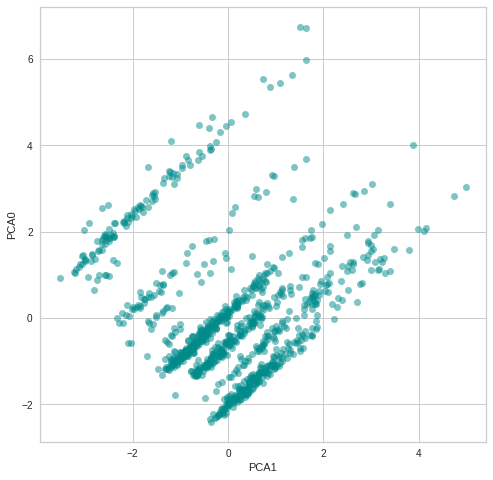

In [ ]:
pca_x = 1
pca_y = 0

tocluster = pd.DataFrame(ps[[pca_x,pca_y]])
print (tocluster.shape)
fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[pca_x], tocluster[pca_y], 
         'o', markersize=7, 
         color='darkcyan', alpha=0.5, label='class1')
plt.xlabel('PCA' + str(pca_x))
plt.ylabel('PCA' + str(pca_y))
#plt.legend()
plt.show()

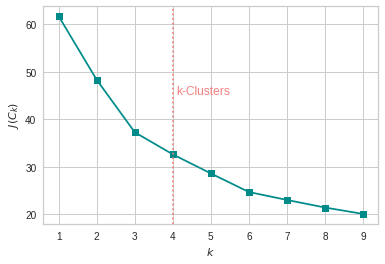

In [ ]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(tocluster)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 10), inertia, marker='s', color='darkcyan');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.axvline(x=4, color= 'lightcoral', linestyle= 'dotted')
plt.text(4.10, 45.25, 'k-Clusters', color = 'lightcoral', fontsize=12)
plt.show()

In [ ]:
clusterer = KMeans(n_clusters= 4,random_state= 42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[-0.07607382 -0.8581762 ]
 [-2.03254315  1.30629397]
 [ 1.76206835  0.84141638]
 [-0.14075519  3.85595692]]


In [ ]:
print(c_preds[0:100])

[0 2 1 2 2 3 0 2 0 2 0 3 0 0 0 0 0 3 2 0 0 0 0 0 0 0 0 0 0 3 1 0 2 1 0 2 3
 0 0 0 0 0 1 2 2 0 0 0 0 0 0 2 0 0 2 0 2 2 0 2 1 0 1 3 0 2 0 0 1 0 2 0 1 3
 1 0 2 0 2 0 2 0 1 1 0 1 0 3 0 1 0 0 0 0 0 3 1 1 0 2]


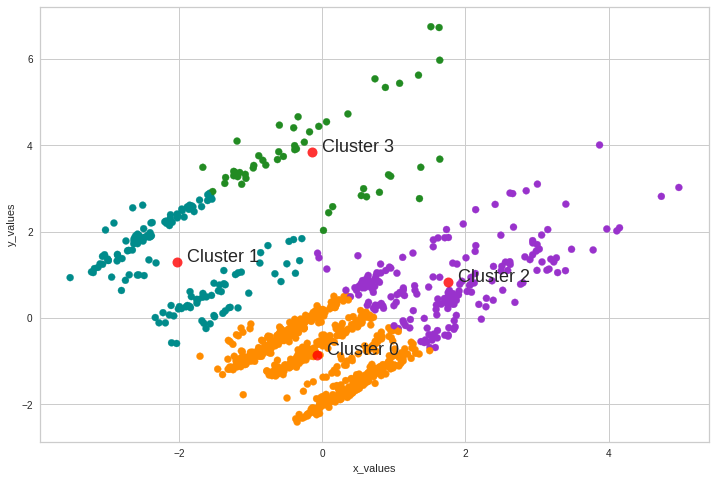

In [ ]:
fig = plt.figure(figsize=(12,8))
colors = ['darkorange','darkcyan','darkorchid','forestgreen']
colored = [colors[k] for k in c_preds]
plt.scatter(tocluster[1],tocluster[0],  color = colored)

for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=10, color='red', alpha=0.8, label=''+str(ci))
    plt.annotate("  Cluster " +str(ci), (c[0], c[1]), fontsize=18)

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

In [ ]:
clust_prod = datos_robust_scaler.copy()
clust_prod['cluster'] = c_preds

In [ ]:
clust_prod.head(10)

,AccStat,duration,credHist,purpose,amount,savings_account,employment,installment_rate,status,debtor,...,age,installment plans,housing,credits,job,economic_dependants,telephone,foreign,rating,cluster
0,-0.333333,-1.0,1.0,0.5,-0.441354,2.0,1.0,0.5,0.0,0.0,...,2.266667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,0.000000,2.5,0.0,0.5,1.393114,0.0,0.0,-0.5,-1.0,0.0,...,-0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,0.666667,-0.5,1.0,2.0,-0.085739,0.0,0.5,-0.5,0.0,0.0,...,1.066667,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1
3,-0.333333,2.0,0.0,0.0,2.133883,0.0,0.5,-0.5,0.0,2.0,...,0.800000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,-0.333333,0.5,0.5,-1.0,0.978421,0.0,0.0,0.0,0.0,0.0,...,1.333333,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2
5,0.666667,1.5,0.0,2.0,2.583869,2.0,0.0,-0.5,0.0,0.0,...,0.133333,0.0,1.0,0.0,-1.0,1.0,1.0,0.0,0.0,3
6,0.666667,0.5,0.0,0.0,0.197756,1.0,1.0,0.0,0.0,0.0,...,1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,0.000000,1.5,0.0,-0.5,1.775583,0.0,0.0,-0.5,0.0,0.0,...,0.133333,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,2
8,0.666667,-0.5,0.0,0.5,0.283687,1.5,0.5,-0.5,-2.0,0.0,...,1.866667,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0
9,0.000000,1.0,1.0,-1.0,1.118059,0.0,-1.0,0.5,1.0,0.0,...,-0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2


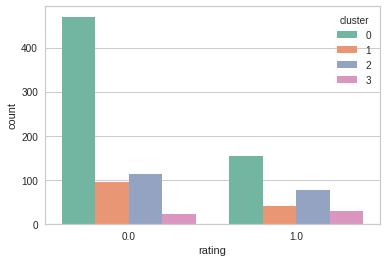

In [ ]:
sns.countplot(clust_prod['rating'], hue=clust_prod['cluster'], palette='Set2')
plt.show()

(1000, 22)


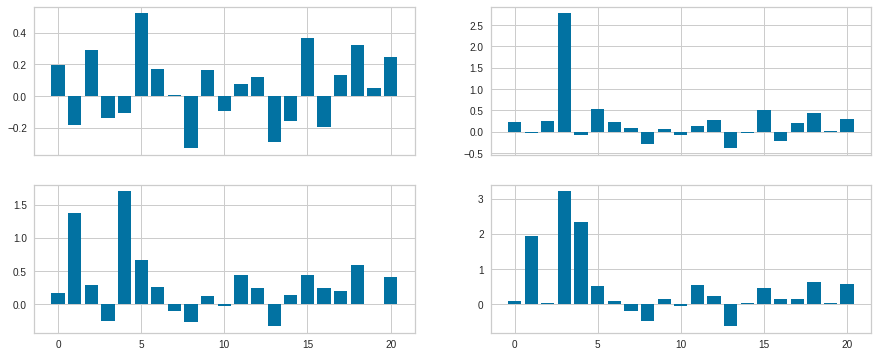

In [ ]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,6))
c1_count = len(clust_prod[clust_prod['cluster']==0])
c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

In [ ]:
c0.sort_values(ascending=False)[0:10]

savings_account        0.521669
credits                0.369181
telephone              0.321027
credHist               0.291332
rating                 0.245586
AccStat                0.198502
employment             0.170947
debtor                 0.166934
economic_dependants    0.133226
age                    0.121348
dtype: float64

In [ ]:
c1.sort_values(ascending=False)[0:10]

purpose                2.777372
savings_account        0.540146
credits                0.510949
telephone              0.437956
rating                 0.299270
age                    0.275912
credHist               0.259124
employment             0.229927
AccStat                0.226277
economic_dependants    0.197080
dtype: float64

In [ ]:
c2.sort_values(ascending=False)[0:10]

amount             1.701777
duration           1.381834
savings_account    0.671958
telephone          0.592593
credits            0.444444
property           0.439153
rating             0.407407
credHist           0.283069
employment         0.261905
job                0.248677
dtype: float64

In [ ]:
c3.sort_values(ascending=False)[0:10]

purpose            3.215686
amount             2.345363
duration           1.928105
telephone          0.627451
rating             0.568627
property           0.539216
savings_account    0.519608
credits            0.450980
age                0.215686
job                0.156863
dtype: float64



### Hierarchical Clustering




In [ ]:
seed_dict = {0:'Good', 1:'Bad'}
seed_list=clust_prod['rating'].map(seed_dict).tolist()

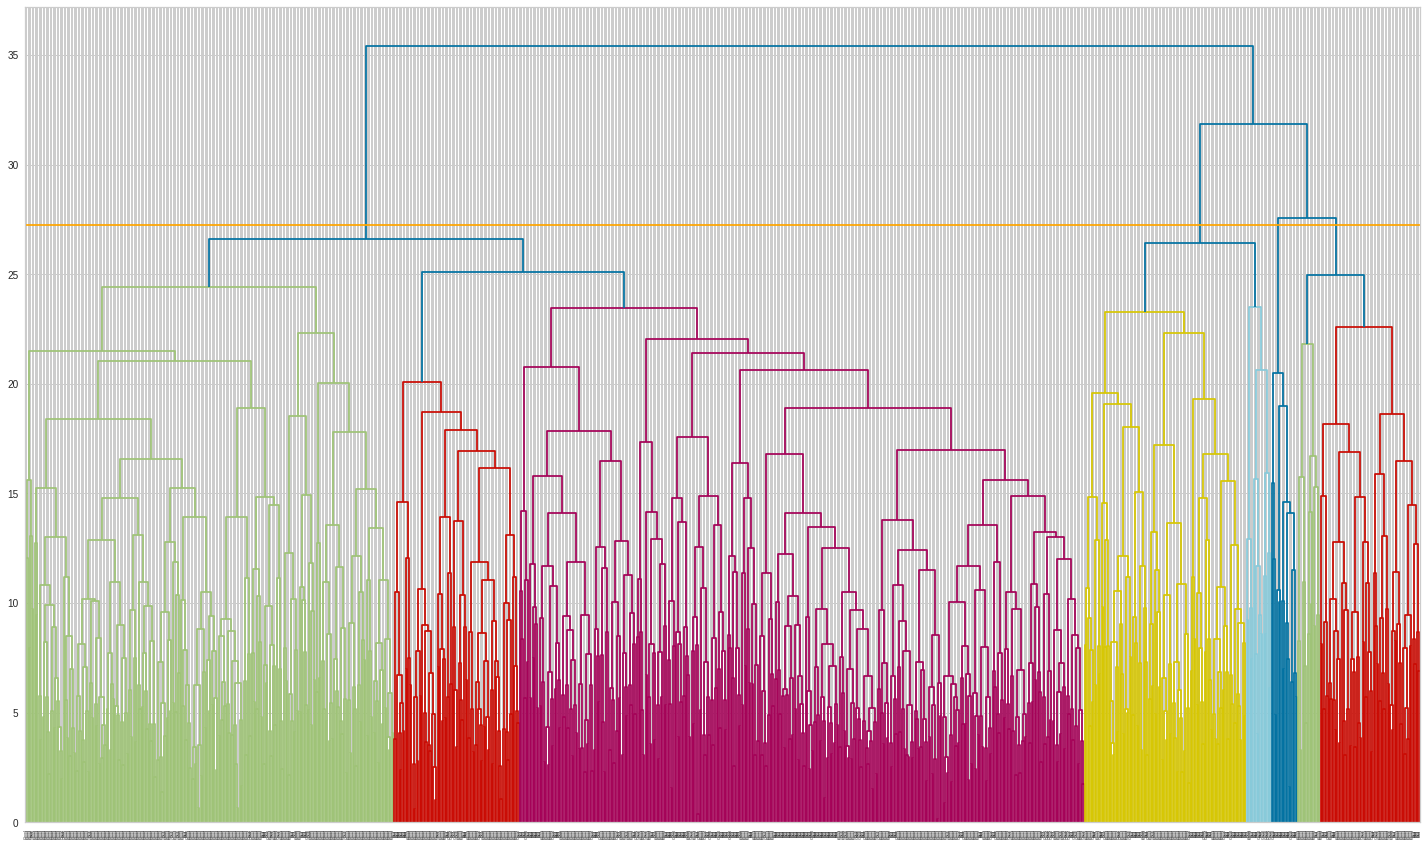

In [ ]:
model=KMeans(n_clusters=3)
mergings=linkage(datos_robust_scaler,method='complete',metric='CityBlock')
seed_labels=model.fit_predict(datos_robust_scaler)
plt.figure(figsize=(25,15))
dendrogram(mergings,labels=seed_list,leaf_rotation= 90,leaf_font_size= 4)
plt.axhline(y=27.25, color='orange')
plt.show()

In [ ]:
labels= fcluster(mergings, 27.25, criterion= 'distance')
print(labels)

[1 2 1 1 1 2 1 2 1 1 1 3 1 1 1 1 1 4 2 1 1 1 1 1 2 1 1 1 1 3 4 1 1 1 1 1 2
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 4 1 4 3 1 4 1 1 1 1 2 1 4 4
 4 1 1 1 2 1 2 1 1 1 1 4 1 2 1 1 1 1 1 1 1 3 1 1 1 4 1 1 1 1 1 3 2 1 2 4 4
 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 2 1 1 1 3 1 1
 1 1 1 1 1 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 4 4 1 2 1
 1 2 1 1 1 4 3 4 1 1 1 1 1 1 2 1 1 4 1 1 2 1 1 4 1 2 1 4 4 2 4 4 1 1 1 1 1
 1 4 1 1 2 1 1 1 1 1 1 1 1 1 2 4 1 1 1 1 2 1 1 4 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 4 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 4 1 1 4 2 2 1 4 2
 1 1 1 2 1 1 1 1 2 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2
 2 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 1 1 1
 1 1 1 2 3 3 1 1 2 1 1 2 1 1 4 1 1 1 4 1 1 1 2 1 1 2 1 1 1 1 1 4 4 1 1 1 1
 1 2 1 1 2 4 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 4 1
 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 4 4 1 1 4 4 1 1 1 1 4 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 

In [ ]:
cf= pd.DataFrame({'labels':labels,
                 'seed_variety':seed_list})
ct= pd.crosstab(cf['labels'],cf['seed_variety'])
ct

seed_variety,Bad,Good
labels,,
1,204,555
2,58,76
3,17,2
4,21,67


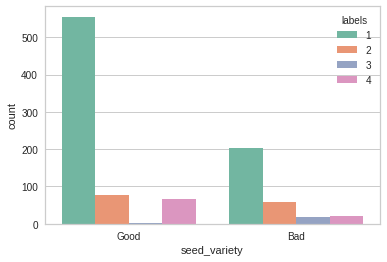

In [ ]:
sns.countplot(data=cf, x='seed_variety', hue='labels',palette='Set2')
plt.show()

## Describir qué conjunto de características comparten los resultados obtenidos con los modelos NO supervisados

Ambos modelos logran la identificación de grupos de registros similares, como por ejemplo, el modelo K-means agrupa en 4 clusters, que algunos dan más valor a la cuenta de ahorros antes que al monto de crédito o la duración del mismo. Posiblemente serían personas que solicitan créditos bajos y por tanto su riesgo es bueno, y por lo mismo no necesitan de otras variables. 

Algo similar pasa con el modelo Hierarchical Clustering, que busca generar clusters de forma iterativa basado en las smilitudes de clusters maás cercanos con características similares. 

## Realizar un comparativo con dos modelos de aprendizaje supervisado 


In [ ]:
datos_robust_scaler.head()

,AccStat,duration,credHist,purpose,amount,savings_account,employment,installment_rate,status,debtor,...,property,age,installment plans,housing,credits,job,economic_dependants,telephone,foreign,rating
0,-0.333333,-1.0,1.0,0.5,-0.441354,2.0,1.0,0.5,0.0,0.0,...,-0.5,2.266667,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,2.5,0.0,0.5,1.393114,0.0,0.0,-0.5,-1.0,0.0,...,-0.5,-0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.666667,-0.5,1.0,2.0,-0.085739,0.0,0.5,-0.5,0.0,0.0,...,-0.5,1.066667,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0
3,-0.333333,2.0,0.0,0.0,2.133883,0.0,0.5,-0.5,0.0,2.0,...,0.0,0.800000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.333333,0.5,0.5,-1.0,0.978421,0.0,0.0,0.0,0.0,0.0,...,1.0,1.333333,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
datos_py = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5',
                                       'PCA6','PCA7','PCA8','PCA9','PCA10',
                                       'PCA11','PCA12','PCA13'])
datos_py.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,-0.888718,-0.862977,2.859763,0.472488,0.469586,-0.316261,0.236442,-0.022244,-0.169997,-0.110907,0.833879,0.317907,0.005338
1,1.506326,1.267727,-1.681929,0.060129,-0.163953,-0.461452,-0.432742,0.917889,0.118395,-0.032793,0.292823,-0.592951,-0.328463
2,0.272486,-1.851584,0.589527,-0.458786,0.597587,-0.144778,0.929187,0.748044,-0.598820,-0.110148,-0.028604,-0.519905,-0.444871
3,1.397218,2.008523,0.037029,-1.004250,-0.062892,0.057429,0.331484,0.969237,-1.106025,-0.576039,0.501129,-0.387648,1.683926
4,-0.459927,1.607834,1.000622,-1.294984,0.264679,-0.196269,0.208088,0.373005,-0.456021,0.614141,-0.710738,0.393893,0.469399


In [ ]:
datos_py['rating'] = datos_robust_scaler['rating']
datos_py.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,rating
0,-0.888718,-0.862977,2.859763,0.472488,0.469586,-0.316261,0.236442,-0.022244,-0.169997,-0.110907,0.833879,0.317907,0.005338,0.0
1,1.506326,1.267727,-1.681929,0.060129,-0.163953,-0.461452,-0.432742,0.917889,0.118395,-0.032793,0.292823,-0.592951,-0.328463,1.0
2,0.272486,-1.851584,0.589527,-0.458786,0.597587,-0.144778,0.929187,0.748044,-0.598820,-0.110148,-0.028604,-0.519905,-0.444871,0.0
3,1.397218,2.008523,0.037029,-1.004250,-0.062892,0.057429,0.331484,0.969237,-1.106025,-0.576039,0.501129,-0.387648,1.683926,0.0
4,-0.459927,1.607834,1.000622,-1.294984,0.264679,-0.196269,0.208088,0.373005,-0.456021,0.614141,-0.710738,0.393893,0.469399,1.0


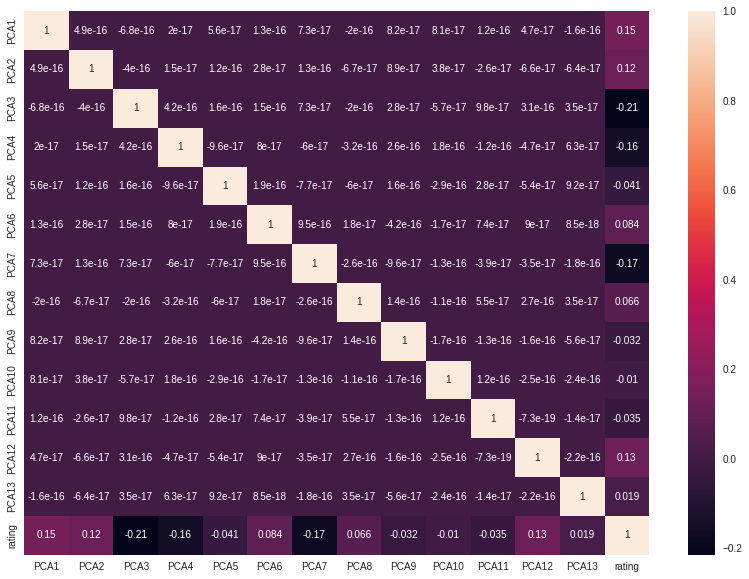

In [ ]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
sns.heatmap(datos_py.corr(), annot=True)
plt.show()

In [ ]:
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(datos_robust_scaler.iloc[:,0:-1], datos_robust_scaler['rating'])

print('Original dataset shape', len(datos_robust_scaler))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 1000
Resampled dataset shape 1400


In [ ]:
columna = list(datos_robust_scaler.columns)

In [ ]:
columna.pop()

'rating'

In [ ]:
balance_data = pd.DataFrame(x_smote, columns=columna)

In [ ]:
balance_data.head(2)

,AccStat,duration,credHist,purpose,amount,savings_account,employment,installment_rate,status,debtor,residence,property,age,installment plans,housing,credits,job,economic_dependants,telephone,foreign
0,-0.333333,-1.0,1.0,0.5,-0.441354,2.0,1.0,0.5,0.0,0.0,0.5,-0.5,2.266667,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,2.5,0.0,0.5,1.393114,0.0,0.0,-0.5,-1.0,0.0,-0.5,-0.5,-0.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
balance_data['rating'] = y_smote

<AxesSubplot: xlabel='rating', ylabel='count'>

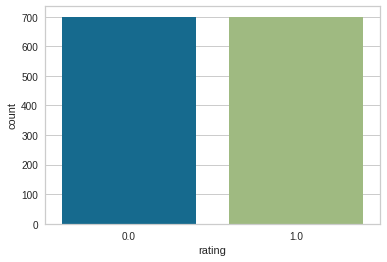

In [ ]:
sns.countplot('rating', data = balance_data)

In [ ]:
ctr1 = setup(data = balance_data,
             target = 'rating',
             train_size = .7,
             transformation_method = 'yeo-johnson',
             pca = False,
             remove_outliers = False,
             fold = 10,
             session_id = 2403
             )

,Description,Value
0,Session id,2403
1,Target,rating
2,Target type,Binary
3,Original data shape,"(1400, 21)"
4,Transformed data shape,"(1400, 21)"
5,Transformed train set shape,"(979, 21)"
6,Transformed test set shape,"(421, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8376,0.9225,0.8506,0.8301,0.8392,0.6752,0.6770,0.2290
rf,Random Forest Classifier,0.8284,0.9120,0.8179,0.8387,0.8259,0.6568,0.6602,0.2740
lightgbm,Light Gradient Boosting Machine,0.8264,0.9036,0.8057,0.8423,0.8216,0.6527,0.6557,0.1940
gbc,Gradient Boosting Classifier,0.8151,0.9003,0.8057,0.8221,0.8122,0.6302,0.6325,0.2220
ada,Ada Boost Classifier,0.7967,0.8750,0.8037,0.7956,0.7976,0.5935,0.5963,0.1510
dt,Decision Tree Classifier,0.7538,0.7539,0.7649,0.7497,0.7561,0.5077,0.5094,0.0390
knn,K Neighbors Classifier,0.7498,0.8213,0.8506,0.7094,0.7721,0.4996,0.5132,0.0510
qda,Quadratic Discriminant Analysis,0.7446,0.8253,0.7913,0.7249,0.7563,0.4893,0.4917,0.0360
lr,Logistic Regression,0.7365,0.8130,0.7503,0.7334,0.7397,0.4728,0.4759,0.5840
ridge,Ridge Classifier,0.7344,0.0000,0.7606,0.7257,0.7406,0.4688,0.4728,0.0290


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=2403, verbose=0, warm_start=False)

### Random Forest Classifier

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8061,0.9102,0.8367,0.7885,0.8119,0.6122,0.6134
1,0.8469,0.9217,0.7959,0.8864,0.8387,0.6939,0.6975
2,0.7959,0.9121,0.8163,0.7843,0.8000,0.5918,0.5923
3,0.8367,0.8940,0.8571,0.8235,0.8400,0.6735,0.6740
4,0.8673,0.9327,0.9184,0.8333,0.8738,0.7347,0.7385
5,0.8163,0.9223,0.7755,0.8444,0.8085,0.6327,0.6348
6,0.7857,0.8882,0.6735,0.8684,0.7586,0.5714,0.5864
7,0.8980,0.9517,0.8776,0.9149,0.8958,0.7959,0.7966
8,0.7857,0.8667,0.8367,0.7593,0.7961,0.5714,0.5744


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf,
                      custom_grid = {'bootstrap': [True, False],
                                     'max_depth': [2 ,8, 16, 32, 64, 100, 125, None],
                                     'max_features': ['auto', 'sqrt', 'log2'],
                                     'min_samples_leaf': [1, 2, 4, 6, 8],
                                     'min_samples_split': [2, 4, 6, 8, 10],
                                     'n_estimators': [10, 25, 50, 75, 100, 150, 200],
                                     'warm_start': [True, False],
                                     'oob_score': [True, False],                                     
                                     },
                      n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8061,0.8925,0.8571,0.7778,0.8155,0.6122,0.6155
1,0.7959,0.9071,0.7551,0.8222,0.7872,0.5918,0.5938
2,0.7653,0.8925,0.7959,0.7500,0.7723,0.5306,0.5316
3,0.7857,0.8759,0.8163,0.7692,0.7921,0.5714,0.5725
4,0.8673,0.9188,0.9184,0.8333,0.8738,0.7347,0.7385
5,0.8163,0.9130,0.7959,0.8298,0.8125,0.6327,0.6332
6,0.8061,0.8975,0.7347,0.8571,0.7912,0.6122,0.6186
7,0.8776,0.9371,0.9184,0.8491,0.8824,0.7551,0.7576
8,0.7959,0.8426,0.8367,0.7736,0.8039,0.5918,0.5938


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


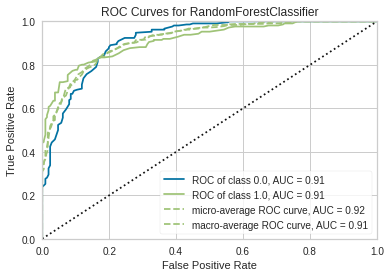

In [ ]:
plot_model(tuned_rf, plot = 'auc', scale = 1)

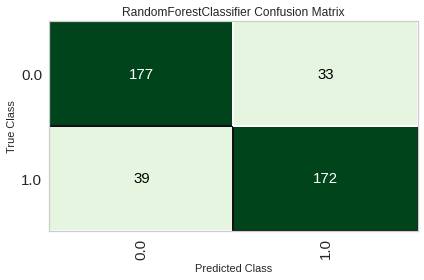

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

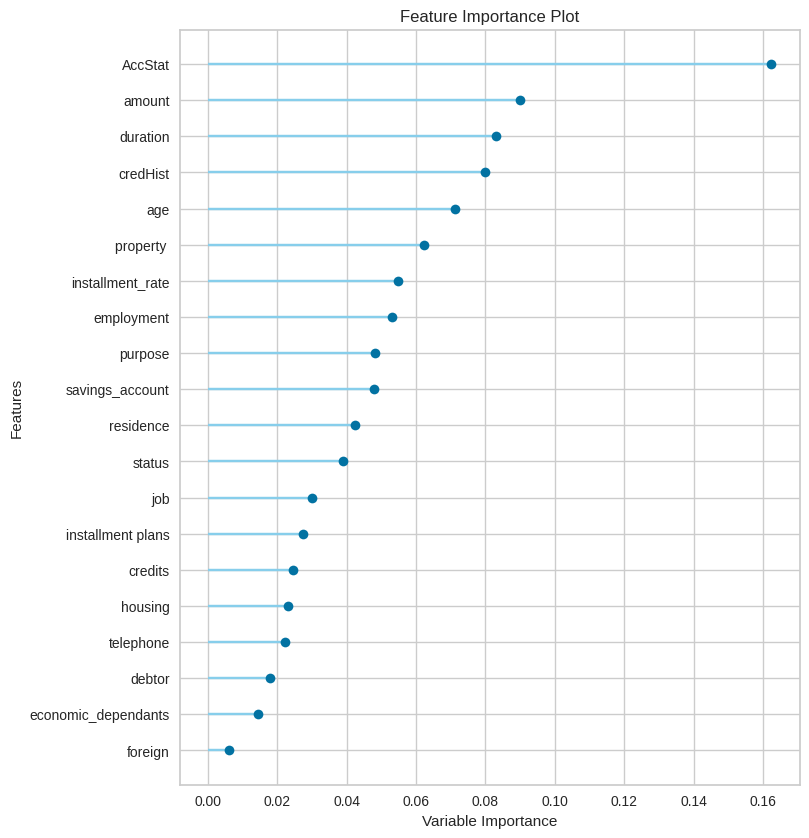

In [ ]:
plot_model(tuned_rf, plot = 'feature_all' )

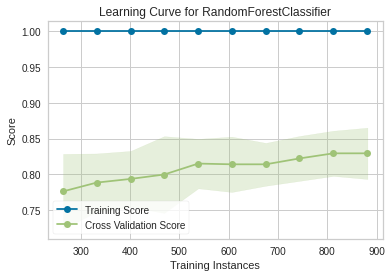

In [ ]:
plot_model(tuned_rf, plot = 'learning')

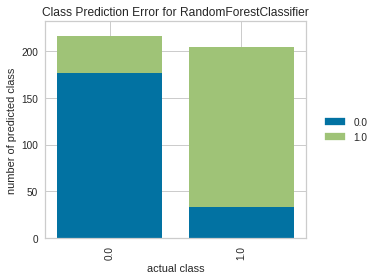

In [ ]:
plot_model(tuned_rf, plot = 'error')

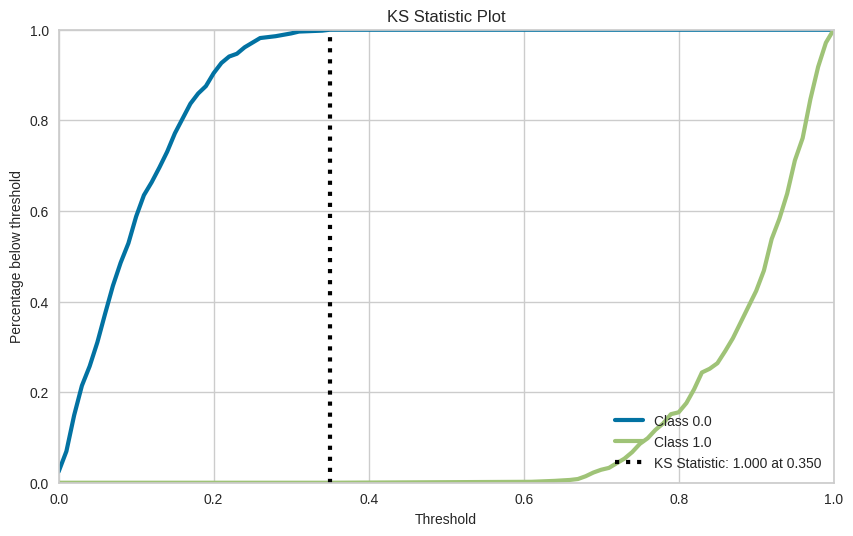

In [ ]:
plot_model(tuned_rf, plot = 'ks')

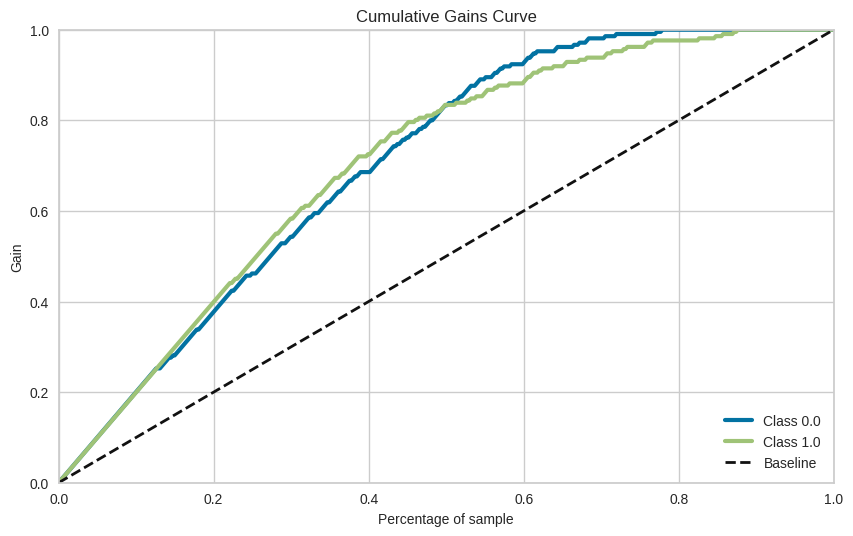

In [ ]:
plot_model(tuned_rf, plot = 'gain')

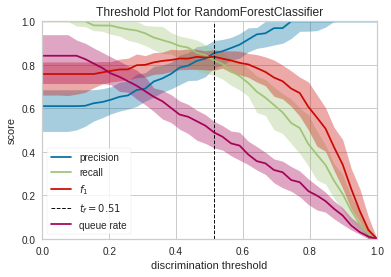

In [ ]:
plot_model(tuned_rf, plot= 'threshold')

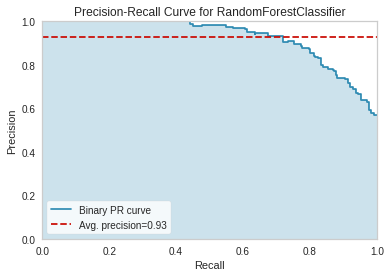

In [ ]:
plot_model(tuned_rf, plot = 'pr')

### Extra Trees Classifier

In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8061,0.9027,0.8571,0.7778,0.8155,0.6122,0.6155
1,0.8367,0.9332,0.8367,0.8367,0.8367,0.6735,0.6735
2,0.7959,0.9313,0.8571,0.7636,0.8077,0.5918,0.5963
3,0.8163,0.8959,0.8367,0.8039,0.8200,0.6327,0.6332
4,0.8776,0.9471,0.9184,0.8491,0.8824,0.7551,0.7576
5,0.8776,0.9350,0.8980,0.8627,0.8800,0.7551,0.7557
6,0.8163,0.9207,0.7551,0.8605,0.8043,0.6327,0.6374
7,0.8878,0.9556,0.9184,0.8654,0.8911,0.7755,0.7770
8,0.8265,0.8890,0.8163,0.8333,0.8247,0.6531,0.6532


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et = tune_model(et,
                       custom_grid = {'max_features': [5,8,10,15,20,25,30],
                                     'max_depth': [1,2,4,6,8,10],
                                     'min_samples_leaf': [1,2,4,6,10,],
                                     'min_samples_split': [2,4,6,10,15]                                    
                                     },                
                      n_iter = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8265,0.8821,0.8776,0.7963,0.8350,0.6531,0.6565
1,0.8163,0.9130,0.7959,0.8298,0.8125,0.6327,0.6332
2,0.7857,0.9050,0.8367,0.7593,0.7961,0.5714,0.5744
3,0.8265,0.8655,0.8776,0.7963,0.8350,0.6531,0.6565
4,0.8571,0.9105,0.9184,0.8182,0.8654,0.7143,0.7197
5,0.8265,0.9055,0.8776,0.7963,0.8350,0.6531,0.6565
6,0.8367,0.9105,0.8367,0.8367,0.8367,0.6735,0.6735
7,0.8367,0.9338,0.8776,0.8113,0.8431,0.6735,0.6757
8,0.7857,0.8609,0.8163,0.7692,0.7921,0.5714,0.5725


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
plot_model(tuned_et, plot='parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


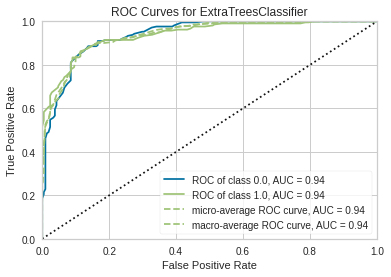

In [ ]:
plot_model(tuned_et, plot='auc', scale = 1)

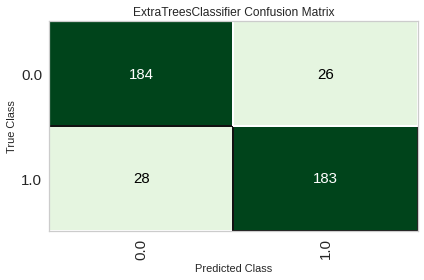

In [ ]:
plot_model(tuned_et, plot='confusion_matrix')

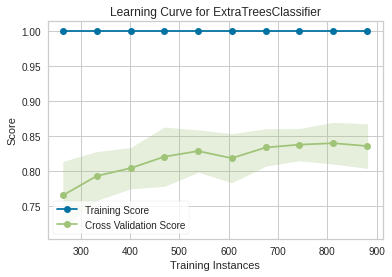

In [ ]:
plot_model(tuned_et, plot='learning', scale = 1)

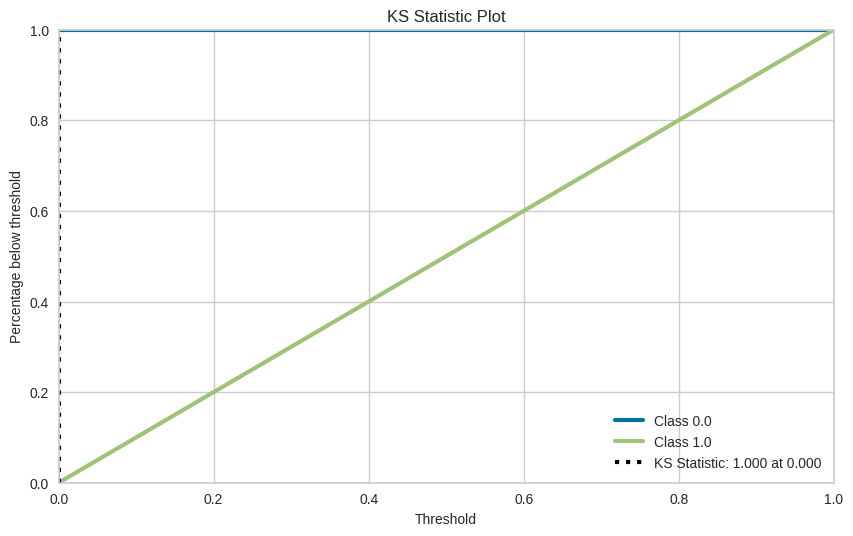

In [ ]:
plot_model(tuned_et, plot='ks')

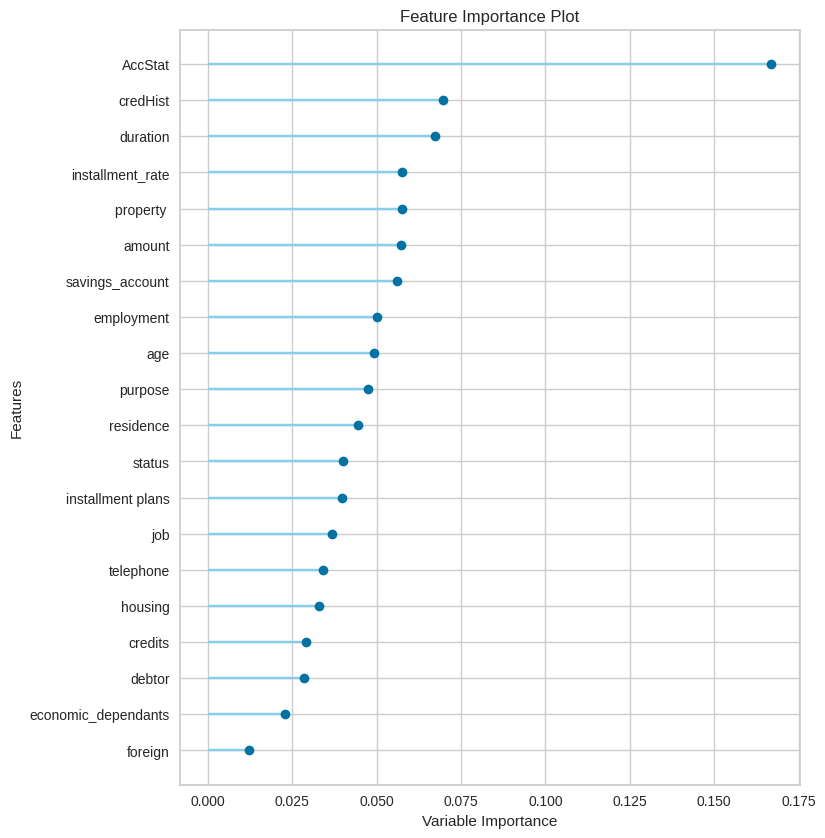

In [ ]:
plot_model(tuned_et, plot='feature_all')

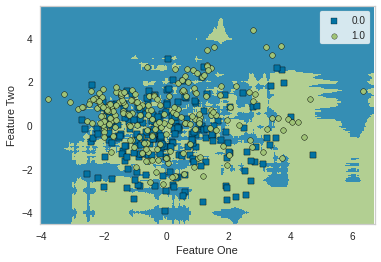

In [ ]:
plot_model(tuned_et, plot='boundary')

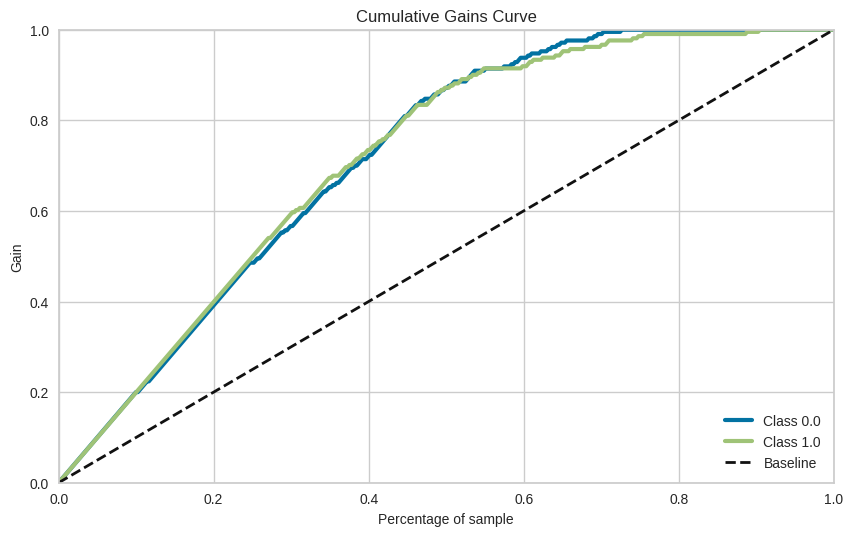

In [ ]:
plot_model(tuned_et, plot = 'gain')

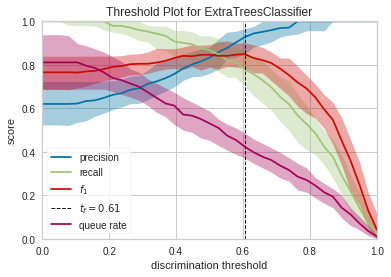

In [ ]:
plot_model(tuned_et, plot= 'threshold')

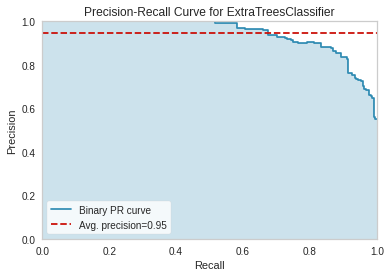

In [ ]:
plot_model(tuned_et, plot = 'pr')

## Describir los resultados obtenidos

Las métricas obtenidas para los dos modelos elegidos son consideradas excelentes comparando con las que la UCI proporciona como referencia en su página actualizada (https://archive-beta.ics.uci.edu/dataset/144/statlog+german+credit+data).

Esto se debe en gran medida al preprocesamiento de los datos, es decir, la normalización y el tratamiento de clases desbalanceadas. Pero sobre todo al  uso de pycaret ya que podemos comparar varios modelos al mismo tiempo, y posteriormente, elegir y ajustar los hiperparámetros, en este caso, los dos modelos con mayor precisión. 
Es decir 'Random Forest Classifier' y 'Extra Trees Classifier'. 

Además midiendo y graficando el área bajo la curva ROC, y la matriz de confusión, para mostrar de una mejor manera el potencial y limitaciones que ambos modelos tienen.


## Medir el rendimiento de los modelos

In [ ]:
model_random_forest_classifier = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8290,0.9138,0.8152,0.8390,0.8269,0.6580,0.6582


In [ ]:
model_extra_tree_classifier = predict_model(tuned_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8717,0.9391,0.8673,0.8756,0.8714,0.7435,0.7435


# 4. Conclusiones


## ¿Qué variables proporcionan mayor información?



Las variables que más peso tienen en los modelos supervisados son:
 * 'AccStat' - Estado de la cuenta corriente existente.
 * 'ammount' - Monto de crédito.
 * 'duration' - Duración.
 * 'credHist' - Historial crediticio.
 * 'property' - Propiedad.

Variables que tienen total sentido que sean relevantes para la toma de decision sobre la calidad de riesgo que implica una persona que busca un crédito

## ¿Qué modelo tuvo el mejor desempeño y por qué?

El modelo con el mayor nivel de precisión es 'model_extra_tree_classifier' 

Esto debido a que para los modelos supervisados se hizo una tratamiento de clases desbalanceadas al conjunto de datos normalizado, ya que si se utilizaba el conjunto con la proporcion de 70% creditos 'buenos' y 30% creditos 'malos' los modelos tendrían un menor nivel de precisión, ya que los algoritmos de entrenamiento están diseñados para reducir el error. 

## ¿Qué variables propondrías a fin de mejorar el cálculo del Otorgamiento de Crédito?

* **Variables Cualitativas:**
  * Sexo
  * Educación (años)
* **Variables Cuantitativas:**  
  * Ingreso Mensual
  * Número de Autos




# 5. Referencias (Citas en formato APA)


## ¿Qué fuentes consultaron para entender el problema?

* UC Irvine Machine Learning Repository. (s. f.). https://archive-beta.ics.uci.edu/dataset/144/statlog+german+credit+data
* Espin-García, O., & Rodríguez-Caballero, C. V. (2013). METODOLOGÍA PARA UN SCORING DE CLIENTES SIN REFERENCIAS CREDITICIAS. Cuadernos de Economía, 32(59), 137–162. http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0121-47722013000100007
* 7 pasos ineludibles para el otorgamiento de crédito. (2020, 22 mayo). CESA. https://www.cesa.edu.co/news/7-pasos-ineludibles-para-el-otorgamiento-de-credito/


## ¿Qué fuentes consultaron para entender y ampliar su conocimiento en los modelos de aprendizaje?

* Mikulski, B. (2019, 3 junio). PCA — how to choose the number of components? Bartosz Mikulski. https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
* Sindico, A. (2017, 18 octubre). Customer Segments with PCA. Kaggle. https://www.kaggle.com/code/asindico/customer-segments-with-pca
* T. (2017, 19 octubre). Dimensionality reduction (PCA, tSNE). Kaggle. https://www.kaggle.com/code/tilii7/dimensionality-reduction-pca-tsne/notebook
* Banerjee, P. (2020, 8 diciembre). K-Means Clustering with Python. Kaggle. https://www.kaggle.com/code/prashant111/k-means-clustering-with-python
* VanderPlas, J. (s. f.). In Depth: k-Means Clustering | Python Data Science Handbook. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
* What is K Means? (s. f.). NVIDIA Data Science Glossary. https://www.nvidia.com/en-us/glossary/data-science/k-means/
* A. (2022, 14 julio). K-Means Clustering Algorithm. Acadgild. https://acadgild.com/blog/k-means-clustering-algorithm/
* K-Means Clustering in Python with scikit-learn. (2018, julio). https://www.datacamp.com/tutorial/k-means-clustering-python. https://www.datacamp.com/tutorial/k-means-clustering-python
* PyCaret — pycaret 2.3.5 documentation. (s. f.). https://pycaret.readthedocs.io/en/stable/index.html
* Mavuduru, A. (2022, 1 enero). How to use PyCaret  - the library for easy ML | Towards Data Science. Medium. https://towardsdatascience.com/how-to-use-pycaret-the-library-for-lazy-data-scientists-91343f960bd2
* Khandelwal, R. (2022, 6 enero). Everything on Hierarchical Clustering - Towards AI. Medium. https://pub.towardsai.net/everything-on-hierarchical-clustering-60bf613377a2
* Goswami, S. (2021, febrero 18). SMOTE using python. Towards Data Science. https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688
* Brownlee, J. (2020, 17 marzo). SMOTE for Imbalanced Classification with Python. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/. https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
* Patlolla, C. R. (2022, 15 agosto). Understanding the concept of Hierarchical clustering Technique. Medium. https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

In [ ]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/BA_CGLP.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/BA_CGLP.ipynb to pdf
[NbConvertApp] Support files will be in BA_CGLP_files/
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./BA_CGLP_files
[NbConvertApp] Making directory ./